### Importing Appropriate libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
pd.set_option('display.colheader_justify', 'left')
pd.set_option('display.precision', 5)

### Creating Header Dataframe

In [6]:
df = pd.read_excel("1 Districtwise IPC Crimes_2021.xlsx")
df.iloc[0:5]

,Districtwise IPC Crimes - 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143
0,S. No,State/UT/District,Offences affecting the Human Body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offences against State,NaN,NaN,NaN,Offences against Public Tranquillity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offences against Property,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offences Relating to Documents & Property Marks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miscellaneous IPC Crimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other IPC Crimes,Total Cognizable IPC crimes
1,NaN,NaN,Murder (Sec.302 IPC),Culpable Homicide not amounting to Murder (Sec...,Causing Death by Negligence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dowry Deaths (Sec.304-B IPC),Abetment of Suicide (Sec.305/306 IPC),Attempt to Commit Murder (Sec.307 IPC),Attempt to commit Culpable Homicide (Sec.308 IPC),Attempt to Commit Suicide (Sec.309 IPC),"Miscarriage, Infanticide, Foeticide and Abando...",Hurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wrongful Restraint/Confinement (Sec.341 to 348...,Assault on Women with Intent to Outrage her Mo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kidnapping and Abduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Human Trafficking (U/S 370),Exploitation of Trafficked Person 370A IPC),Selling of Minors for Prostitution (Sec.372 IPC),Buying of Minors for Prostitution (Sec.373 IPC),Rape (Sec.376 IPC),Attempt to Commit Rape (Sec.376/511 IPC),Unnatural Offences (Sec.377 IPC),Offences Affecting the Human Body (Total),NaN,NaN,NaN,NaN,"Unlawful Assembly (Sec.143, 144 & 145)",Rioting (Sec.1470151 IPC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offences promoting enmity between different gr...,NaN,NaN,Affray (Sec.159 & 160 IPC),Offences against Public Tranquillity (Total),Theft (Section 379 IPC),NaN,NaN,Burglary (Sec.454 to 460 r/w Sec.380 IPC),NaN,NaN,Extortion & Blackmailing (Sec.384 to 389 IPC),Robbery (Sec.392/394/397 IPC),Attempt to Commit Dacoity/Robbe

### Creating West Bengal Dataframe

In [7]:
df1=df.loc[df['Districtwise IPC Crimes - 2020'] == 'State: West Bengal'].dropna()
df1['Unnamed: 2'] = df1['Unnamed: 2'].astype(int) 
s ='Unnamed: '
for i in range (2,143):
    y = str(i)
    e = s + y
    df1[e] = df1[e].astype(int)
df1

,Districtwise IPC Crimes - 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143
925,State: West Bengal,Alipurduar,35,15,73,73,10,63,0,0,0,0,10,15,112,0,0,0,470,176,113,45,18,0,0,294,249,44,0,0,0,1,0,18,40,25,2,0,0,0,2,10,3,0,154,150,0,150,0,1,0,1,1,0,1,0,0,0,0,41,23,1,1007,0,0,0,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,7,159,71,88,1,0,1,12,3,2,0,0,0,13,0,26,2,218,1,0,0,0,1,68,0,0,0,0,0,55,13,69,0,221,0,0,154,1,6,147,1,0,0,0,0,0,14,56,317,2,0,0,765,209,2275
926,State: West Bengal,Asansol-Durgapur PC,56,15,246,242,0,242,0,0,0,4,17,32,210,3,0,0,192,186,157,29,0,0,0,6,0,5,1,0,0,0,0,242,23,11,3,0,0,0,3,4,1,4,114,89,0,89,0,0,2,20,0,0,3,0,1,0,0,19,22,0,1192,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,23,307,63,244,9,0,9,11,15,0,4,4,0,116,0,164,347,973,1,0,0,0,1,397,0,0,0,0,0,286,111,398,0,113,0,0,110,0,14,96,0,0,0,0,0,0,3,0,540,5,1352,5,2128,150,4864
927,State: West Bengal,Bankura,60,4,152,151,0,151,0,0,0,1,19,22,262,26,0,0,549,12,8,4,0,0,0,537,474,61,1,0,0,1,0,104,51,22,5,0,0,0,5,23,0,1,97,16,0,16,0,0,0,9,0,0,72,1,0,0,0,17,7,0,1371,0,0,0,0,3,25,1,0,0,5,0,0,0,0,0,1,0,0,0,0,0,18,0,0,0,0,28,102,29,73,3,0,3,4,10,0,3,3,0,24,0,6,0,152,0,0,0,0,0,81,0,0,0,0,0,53,28,81,0,9,0,0,97,0,5,92,4,0,0,0,0,0,14,108,287,0,0,23,542,150,2324
928,State: West Bengal,Barrackpur PC,77,11,98,94,0,94,0,0,0,4,13,39,499,25,0,3,1138,0,0,0,0,0,0,1138,769,365,3,1,0,0,0,311,622,390,34,0,0,0,34,158,17,23,266,90,0,90,0,5,2,6,4,0,159,1,0,0,0,18,23,0,3144,0,0,0,0,14,41,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,33,4,4,0,0,59,672,149,523,7,0,7,81,12,0,7,6,1,152,0,121,4,1056,3,0,0,0,3,1085,0,0,0,0,0,1015,70,1088,0,0,0,0,169,0,27,142,0,0,0,0,0,0,21,0,1501,0,0,34,1725,1549,8621
929,State: West Bengal,Bidhannagar PC,17,2,48,48,0,48,0,0,0,0,3,8,108,17,0,0,120,0,0,0,0,0,0,120,89,30,1,0,0,0,0,0,71,24,10,0,0,0,10,6,5,26,63,51,0,51,0,0,2,3,1,0,6,3,1,0,0,12,7,0,480,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,209,67,142,0,0,0,5,3,0,0,0,0,101,0,29,0,347,1,0,0,0,1,661,0,0,0,0,0,645,16,662,0,0,0,0,118,0,24,94,0,0,0,0,0,0,2,0,327,0,0,6,453,1479,3423
930,State: West Bengal,Birbhum,81,10,177,174,3,171,0,0,0,3,14,38,770,32,0,0,841,206,174,28,4,0,0,635,482,152,0,1,0,0,0,18,33,14,6,0,0,0,6,9,3,1,114,104,28,76,0,0,1,4,0,0,5,0,0,0,0,25,22,0,2175,0,0,0,0,84,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,113,207,62,

### **Murder Cases**

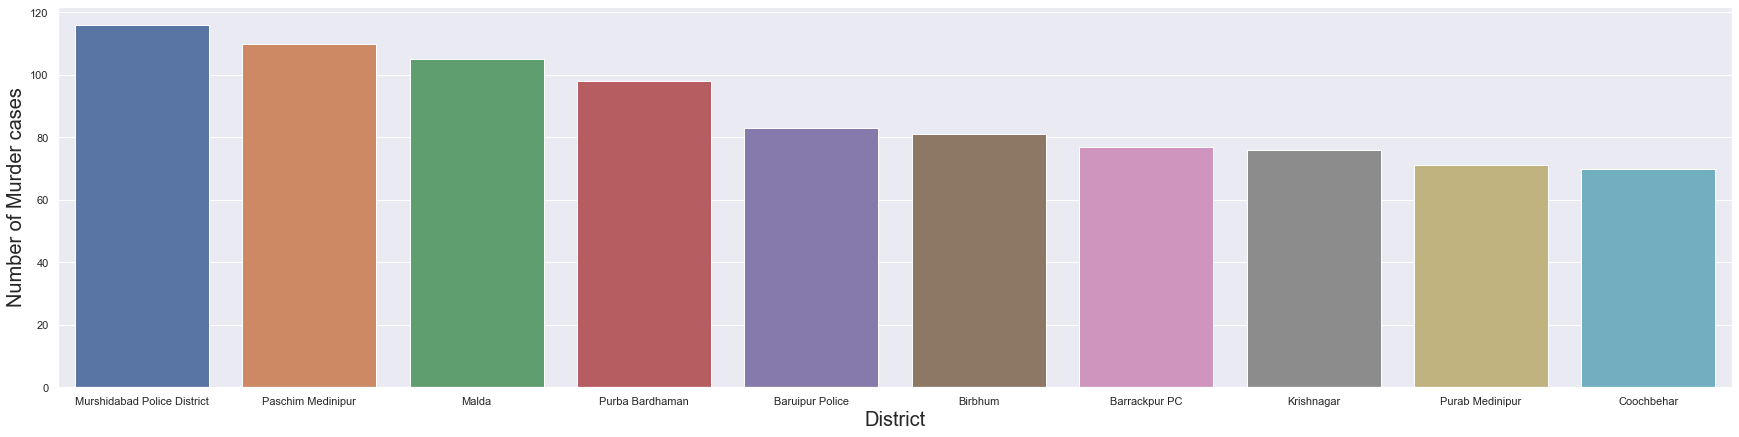

In [8]:
temp=df1.iloc[0:39]
crime_dictionary={
    "Murder":'Unnamed: 2',
    "Rape":'Unnamed: 59',
    "Kidnapping":'Unnamed: 44',
    "Theft":'Unnamed: 90',
    "Human Trafficking":'Unnamed: 55'
}
df2 = temp.sort_values('Unnamed: 2', ascending=False)
df2 = df2.iloc[0:10]
sns.set(rc={'figure.figsize': (30, 7)})
ax = sns.barplot(x=df2['Unnamed: 1'],y=df2['Unnamed: 2'])
ax.set_xlabel('District', fontsize=20)
ax.set_ylabel('Number of Murder cases', fontsize=20)
list_murder = set(df2['Unnamed: 1'])

### **Rape Cases**

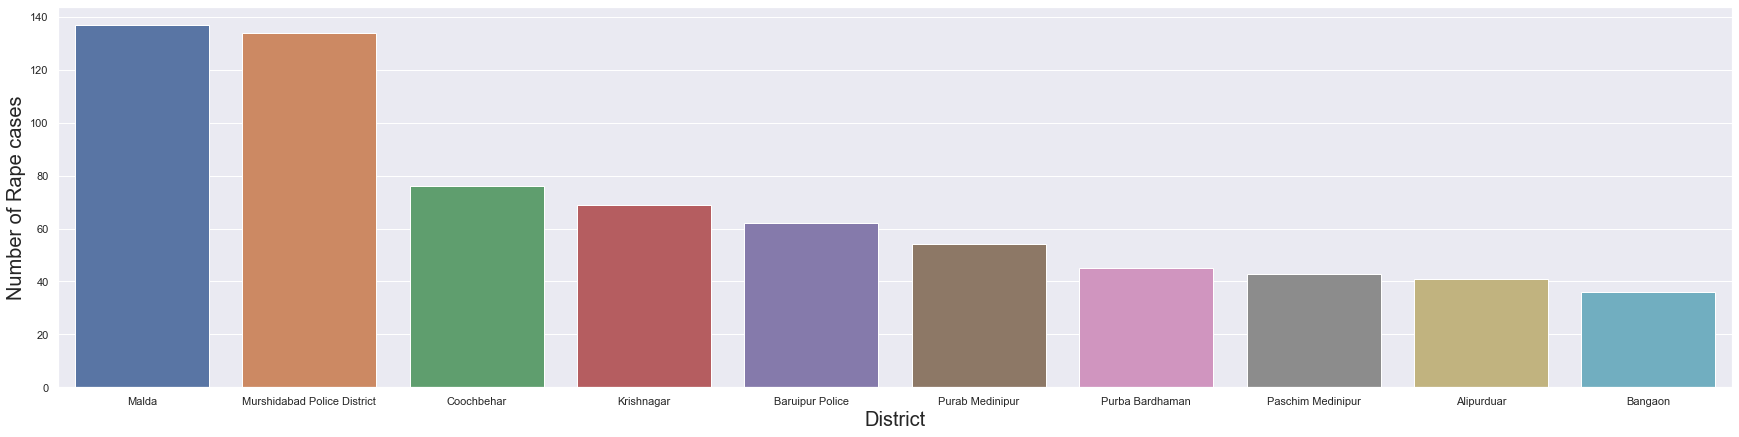

In [9]:
df3 = temp.sort_values('Unnamed: 59', ascending=False)
df3 = df3.iloc[0:10]
sns.set(rc={'figure.figsize': (30, 7)})
ax = sns.barplot(x=df3['Unnamed: 1'],y=df3['Unnamed: 59'])
ax.set_xlabel('District', fontsize=20)
ax.set_ylabel('Number of Rape cases', fontsize=20)
list_rape = set(df3['Unnamed: 1'])

### Kidnapping Cases

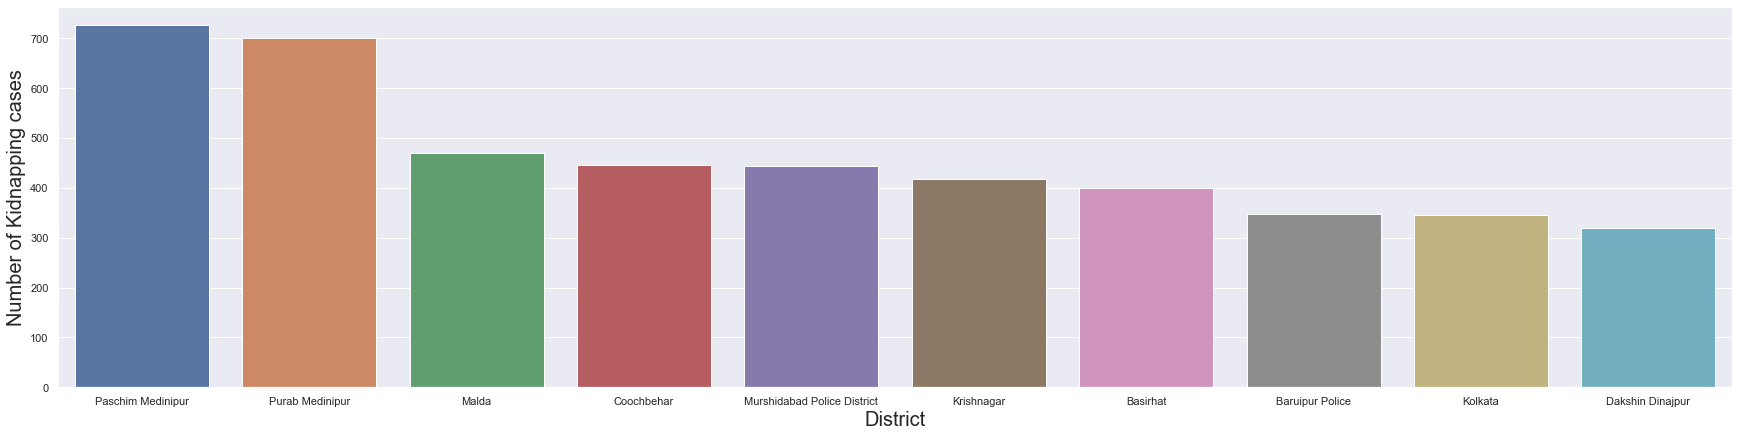

In [10]:
df4 = temp.iloc[0:39]
df4 = df4.sort_values('Unnamed: 44', ascending=False)
df4 = df4.iloc[0:10]
sns.set(rc={'figure.figsize': (30, 7)})
ax = sns.barplot(x=df4['Unnamed: 1'],y=df4['Unnamed: 44'])
ax.set_xlabel('District', fontsize=20)
ax.set_ylabel('Number of Kidnapping cases', fontsize=20)
list_kidnapping = set(df4['Unnamed: 1'])

### Theft Cases

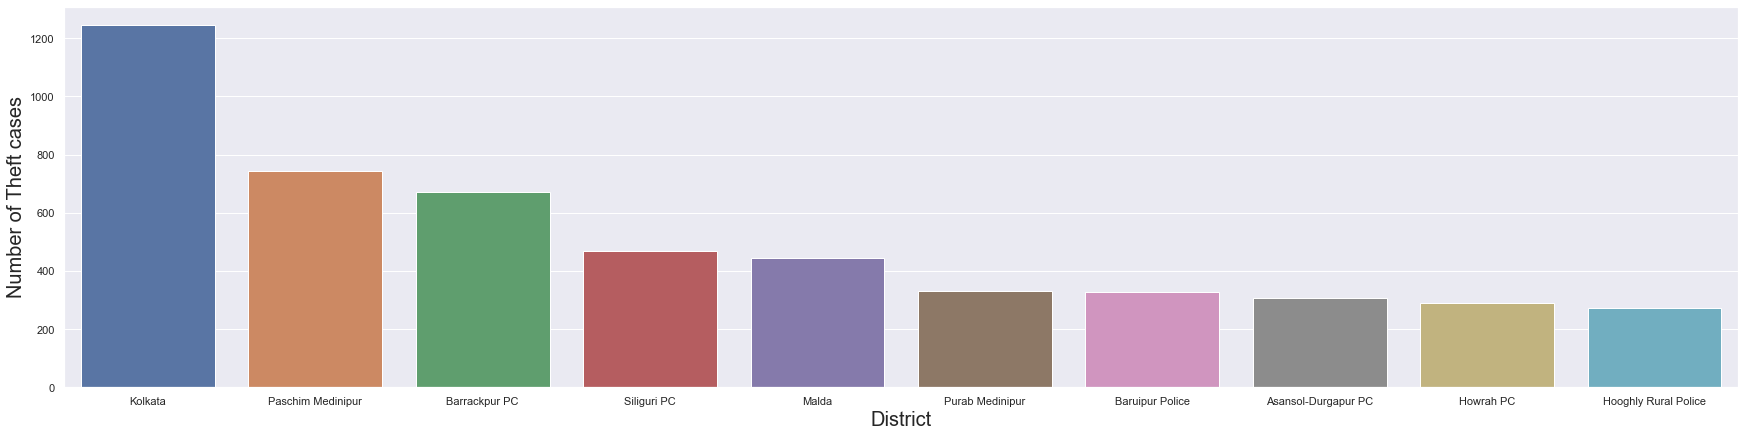

In [11]:
df5 = temp.iloc[0:39]
df5 = df5.sort_values('Unnamed: 90', ascending=False)
df5 = df5.iloc[0:10]
sns.set(rc={'figure.figsize': (30, 7)})
ax = sns.barplot(x=df5['Unnamed: 1'],y=df5['Unnamed: 90'])
ax.set_xlabel('District', fontsize=20)
ax.set_ylabel('Number of Theft cases', fontsize=20)
list_theft = list(df5['Unnamed: 1'])

## Human Trafficking Cases

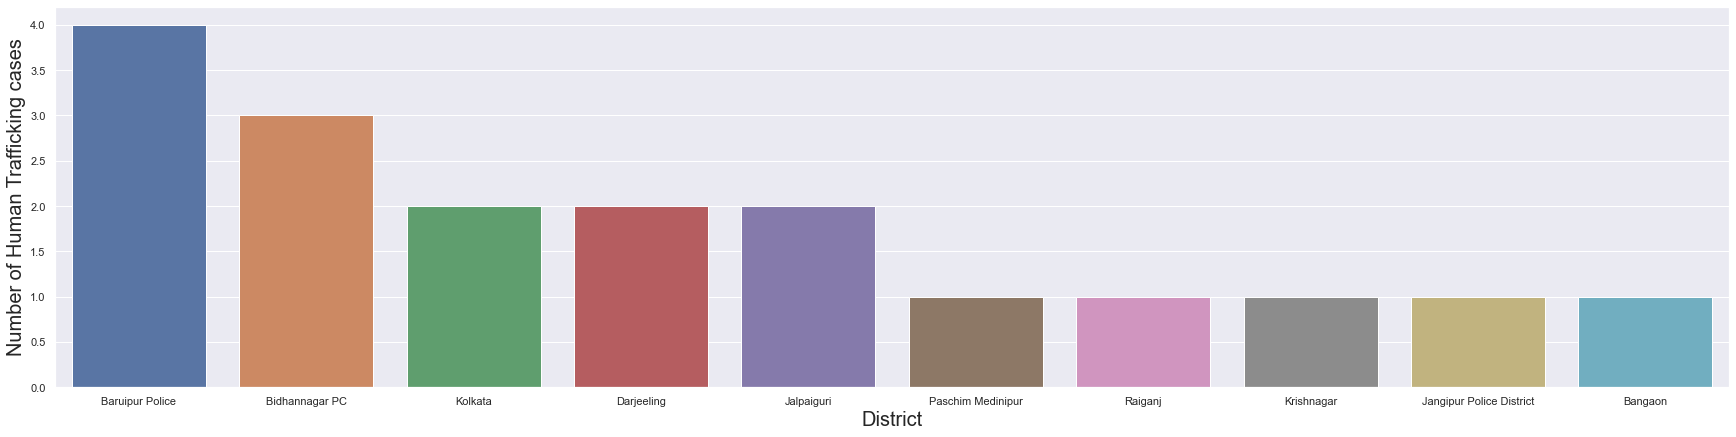

In [12]:
df5 = temp.iloc[0:39]
df5 = df5.sort_values('Unnamed: 55', ascending=False)
df5 = df5.iloc[0:10]
sns.set(rc={'figure.figsize': (30, 7)})
ax = sns.barplot(x=df5['Unnamed: 1'],y=df5['Unnamed: 55'])
ax.set_xlabel('District', fontsize=20)
ax.set_ylabel('Number of Human Trafficking cases', fontsize=20)
list_Human_Trafficking = list(df5['Unnamed: 1'])

### Finding Cities that have most number of crimes in terms of Murder, Rape, Theft, Kidnapping and Human Trafficking

In [13]:
set_list=[list_murder,list_kidnapping,list_rape,list_Human_Trafficking]
common = set.intersection(*set_list)
common = list(common)
print("Cities where majority of crimes is happening")
common

Cities where majority of crimes is happening


['Baruipur Police', 'Krishnagar', 'Paschim Medinipur']

### Finding the row number to locate the row of a city

In [14]:
x=temp[temp['Unnamed: 1'] == 'Malda'].index[0]
print(temp.loc[x]['Unnamed: 2'])

105


### Aggregating the total number of crimes prevalent in the most common cities

In [15]:
crime_index={}
val=0
sum=0
for i in common: # City name
  print(i)
  for j in crime_dictionary: # Unnamed
     x=temp[temp['Unnamed: 1'] == i].index[0]
     val=temp.loc[x][crime_dictionary[j]]
     sum=sum+val
  crime_index[i]=sum
  sum=0
crime_index

Baruipur Police
Krishnagar
Paschim Medinipur


{'Baruipur Police': 824, 'Krishnagar': 762, 'Paschim Medinipur': 1624}

### Plotting Pie Chart to show which district has most number of crimes

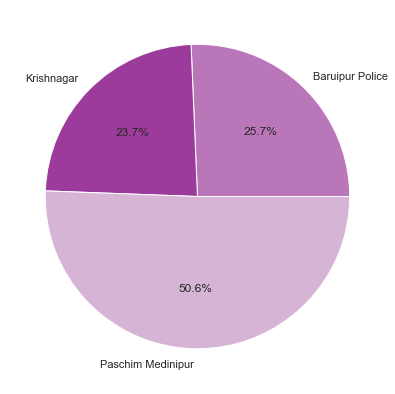

In [16]:
total_crime_district_number=[]
total_crime_district_name=[]
for i in crime_index:
  total_crime_district_number.append(crime_index[i])
  total_crime_district_name.append(i)
palette = sns.light_palette('purple', n_colors=5)
colors = [palette[2], palette[3], palette[1]]
plt.pie(total_crime_district_number, labels=total_crime_district_name, colors=colors, autopct='%1.1f%%')
plt.show()


In [17]:
c = list(common)
ll = [[25.0108, 88.1411],[21.9373, 87.7763],[22.3599, 88.4325],[22.5046, 87.4604]]
lld = {}
for i in range(len(c)):
    lld[c[i]] = ll[i]
lld
dd = pd.DataFrame(lld)
dd
map = folium.Map(location=[25.0108, 88.1411], zoom_start=7, control_scale=True)
map
for i in lld.keys():
    folium.Marker(lld[i],popup= i).add_to(map)
map

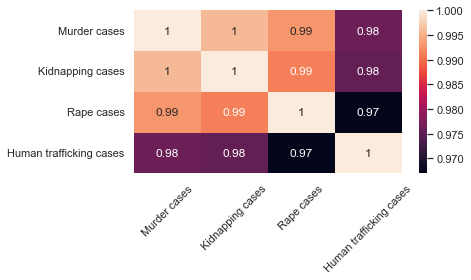

In [93]:
cols = ['Unnamed: 2', 'Unnamed: 44', 'Unnamed: 59','Unnamed: 55']
plt.figure(figsize=(6,3))
dataplot = sns.heatmap(df1[cols].corr(), annot=True)
ax = dataplot.axes
ax.set_xticklabels(['Murder cases', 'Kidnapping cases', 'Rape cases', 'Human trafficking cases'], rotation=45)
ax.set_yticklabels(['Murder cases', 'Kidnapping cases', 'Rape cases', 'Human trafficking cases'], rotation=0)
plt.show()
